In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)
import scipy.io

plt.rcParams['figure.figsize'] = [10, 5]

In [37]:
mat = scipy.io.loadmat("../data/impact locations.mat")
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 23 17:21:01 2021',
 '__version__': '1.0',
 '__globals__': [],
 'baselocs': array([[   27722, 10544897]], dtype=int32),
 'elecmax1': array([[ 1506127,  1828393,  2103572,  2332113,  2566359,  2806427,
          3246204,  3475576,  3712770,  3963481,  4208934,  4544740,
          4840659,  5064290,  5314417,  5557193,  5936062,  6213199,
          6451715,  6695044,  6941686,  7206205,  7431075,  7731054,
          8080362,  8317857,  8562682,  8847325,  9142217,  9549010,
          9801198, 10049013, 10301077]], dtype=int32)}

In [156]:
raw = mne.io.read_raw_eeglab('../data/fixica.set')
# raw = mne.io.read_epochs_eeglab('../data/online_test.set')

Reading /Users/mpin/Documents/MDS/capstone/simpl_eeg_capstone/data/fixica.fdt


<ipython-input-156-747ca8f69166>:1: RuntimeWarning: Data file name in EEG.data (109 whole fixed ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab('../data/fixica.set')


In [157]:
raw

<RawEEGLAB | fixica.fdt, 19 x 11175225 (5456.7 s), ~30 kB, data not loaded>

In [65]:
raw_df = raw.to_data_frame()

In [139]:
raw_df.head()

,time,Fp1,Fp2,F7,T3,T5,F3,C3,P3,Fz,Cz,Pz,F4,C4,P4,F8,T4,T6,O1,O2
0,0,-1.309180,-17.504066,-0.934941,12.458370,3.110043,0.399445,-0.824427,8.192215,2.764535,-1.003163,4.253562,13.615928,3.193182,9.777016,2.023224,8.134605,15.983869,-3.551786,7.306483
1,0,-1.366664,-17.707190,-0.935696,12.504413,3.016100,0.431123,-0.944412,8.104908,2.741335,-1.053120,4.191818,13.737228,3.309192,9.774727,2.021176,8.193565,15.941096,-3.612502,7.278894
2,1,15.275132,-1.613967,25.944092,16.369394,19.123390,20.245935,27.153799,32.618656,4.682581,14.432489,20.894924,-2.061573,-16.849432,13.966457,14.188269,0.948726,35.616409,6.693176,16.724426
3,1,15.259221,-1.763359,25.982115,16.439892,19.149214,20.305655,27.087055,32.651844,4.582679,14.375604,20.861244,-2.067911,-16.759865,13.921695,14.239827,0.961342,35.574158,6.814420,16.962944
4,2,24.320646,21.294743,29.273348,36.190701,30.900623,21.696165,32.211964,43.833370,4.397994,24.987123,32.643608,-18.852341,-7.435656,24.248709,12.634859,0.314506,32.368336,19.638361,16.652056


In [30]:
type(raw)

mne.io.eeglab.eeglab.RawEEGLAB

Effective window size : 1.000 (s)


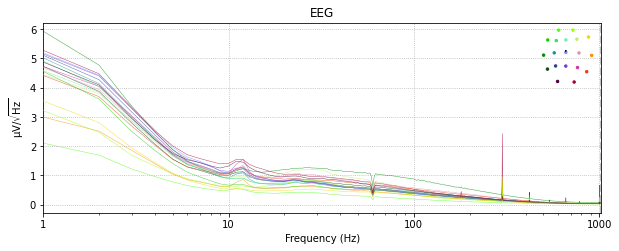

Effective window size : 1.000 (s)


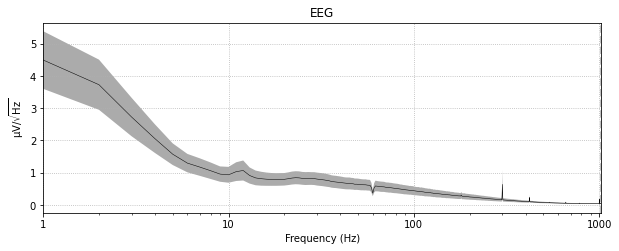

In [44]:
for average in (False, True):
    raw.plot_psd(average=average, dB=False, xscale='log')

Adding average EEG reference projection.
1 projection items deactivated


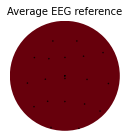

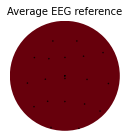

In [31]:
raw.copy().set_eeg_reference(projection=True).plot_projs_topomap() 

In [42]:
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=1, reject=None)

NameError: name 'compute_proj_ecg' is not defined

In [40]:
mne.viz.plot_projs_topomap(raw, info=raw.info)

TypeError: tuple indices must be integers or slices, not str

In [41]:
raw.get_data().shape

(19, 11175225)

In [8]:
# raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6) # Stim channel?

# mne.find_events(raw)

Effective window size : 1.000 (s)


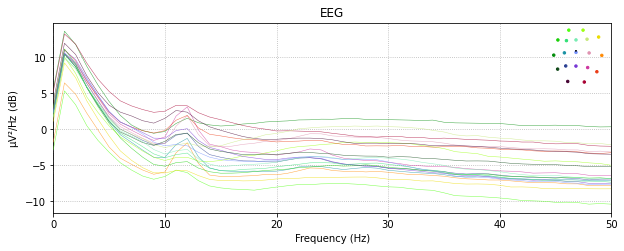

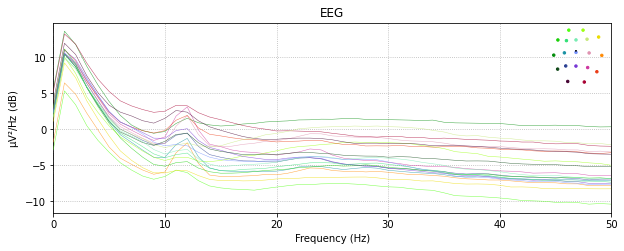

In [24]:
raw.plot_psd(fmax=50)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


<ipython-input-9-5832323e7c42>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 19 components


<ipython-input-9-5832323e7c42>:2: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (12) and smallest (2.7e-15) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


Fitting ICA took 253.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
2728 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
2728 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


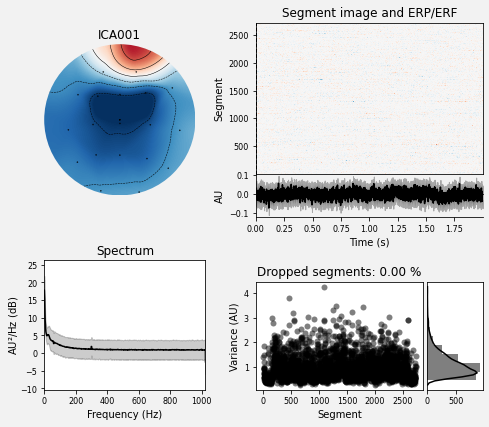

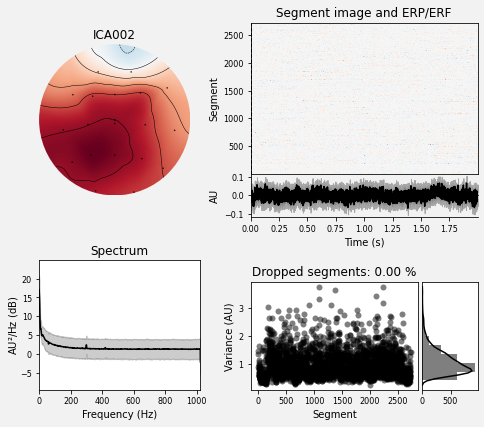

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [9]:
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [158]:
chs = raw.ch_names # get a list of channel names form here
print(len(chs))
chs

19


['Fp1',
 'Fp2',
 'F7',
 'T3',
 'T5',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz',
 'F4',
 'C4',
 'P4',
 'F8',
 'T4',
 'T6',
 'O1',
 'O2']

In [159]:
np.stack([biosemi_montage.get_positions()['ch_pos'][ch] for ch in chs])

KeyError: 'F7'

Fitted sphere radius:         79556.7 mm
Origin head coordinates:      6251.9 -21021.8 8661.2 mm
Origin device coordinates:    6251.9 -21021.8 8661.2 mm


<ipython-input-25-9abcb70dfe3d>:1: RuntimeWarning: Estimated head size (79556.7 mm) exceeded 99th percentile for adult head size
  raw_csd = mne.preprocessing.compute_current_source_density(raw)
<ipython-input-25-9abcb70dfe3d>:1: RuntimeWarning: (X, Y) fit (6251.9, -21021.8) more than 20 mm from head frame origin
  raw_csd = mne.preprocessing.compute_current_source_density(raw)
/Users/mpin/opt/miniconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


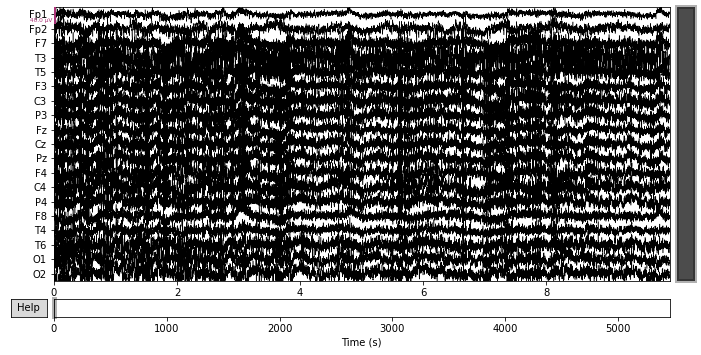

/Users/mpin/opt/miniconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


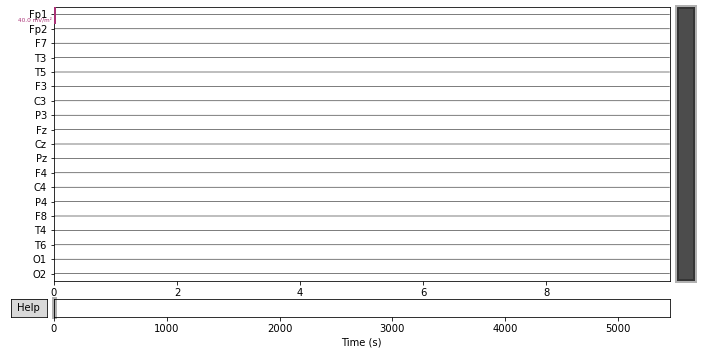

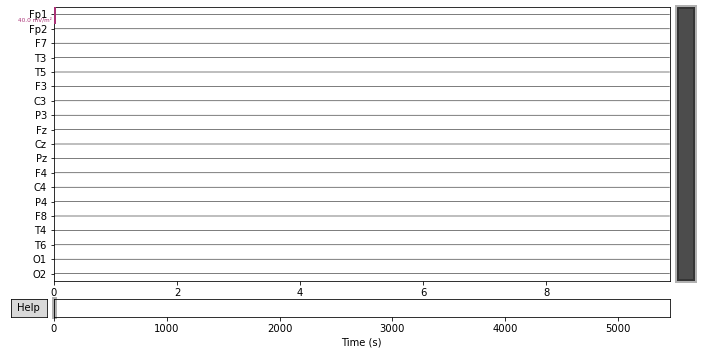

In [25]:
raw_csd = mne.preprocessing.compute_current_source_density(raw)
raw.plot()
raw_csd.plot()

# orig_raw = raw.copy()
# raw.load_data()
# ica.apply(raw)

# # show some frontal channels to clearly illustrate the artifact removal
# chan_idxs = [raw.ch_names.index(ch) for ch in chs]
# orig_raw.plot(order=chan_idxs) # Specify either start=12 or duration=4
# raw.plot(order=chan_idxs) # Specify either start=12 or duration=4

In [78]:
data.shape

(32, 1)

In [79]:
data

array([[ 1.76405235e-06],
       [ 4.00157208e-07],
       [ 9.78737984e-07],
       [ 2.24089320e-06],
       [ 1.86755799e-06],
       [-9.77277880e-07],
       [ 9.50088418e-07],
       [-1.51357208e-07],
       [-1.03218852e-07],
       [ 4.10598502e-07],
       [ 1.44043571e-07],
       [ 1.45427351e-06],
       [ 7.61037725e-07],
       [ 1.21675016e-07],
       [ 4.43863233e-07],
       [ 3.33674327e-07],
       [ 1.49407907e-06],
       [-2.05158264e-07],
       [ 3.13067702e-07],
       [-8.54095739e-07],
       [-2.55298982e-06],
       [ 6.53618595e-07],
       [ 8.64436199e-07],
       [-7.42165020e-07],
       [ 2.26975462e-06],
       [-1.45436567e-06],
       [ 4.57585173e-08],
       [-1.87183850e-07],
       [ 1.53277921e-06],
       [ 1.46935877e-06],
       [ 1.54947426e-07],
       [ 3.78162520e-07]])

In [81]:
biosemi_montage = mne.channels.make_standard_montage('biosemi32')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 32 ch, ~48 kB>

In [82]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
pos = np.stack([biosemi_montage.get_positions()['ch_pos'][ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

KeyError: 'Fpz'

In [ ]:

# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# in the second panel we plot the positions using the EEGLAB reference sphere
fake_evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')


In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')

Creating RawArray with float64 data, n_channels=16, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


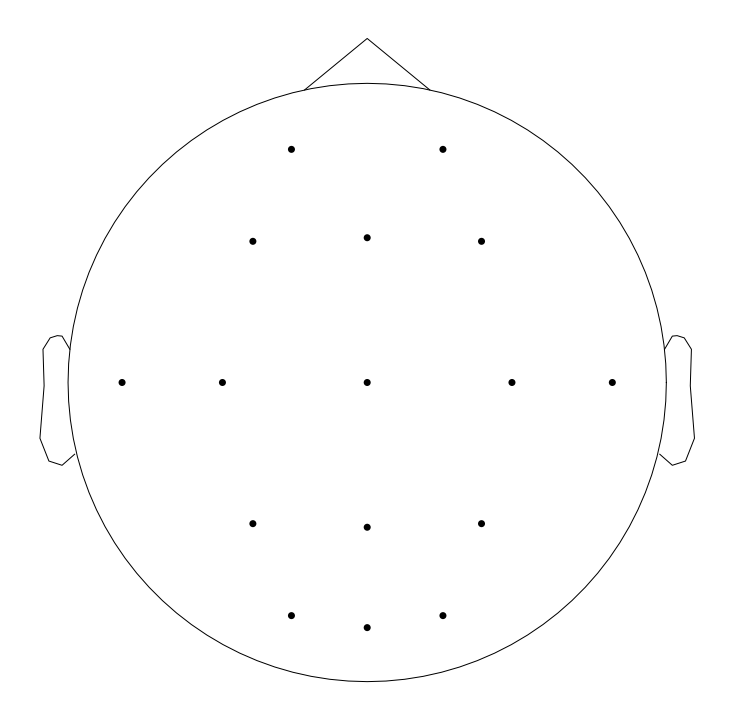

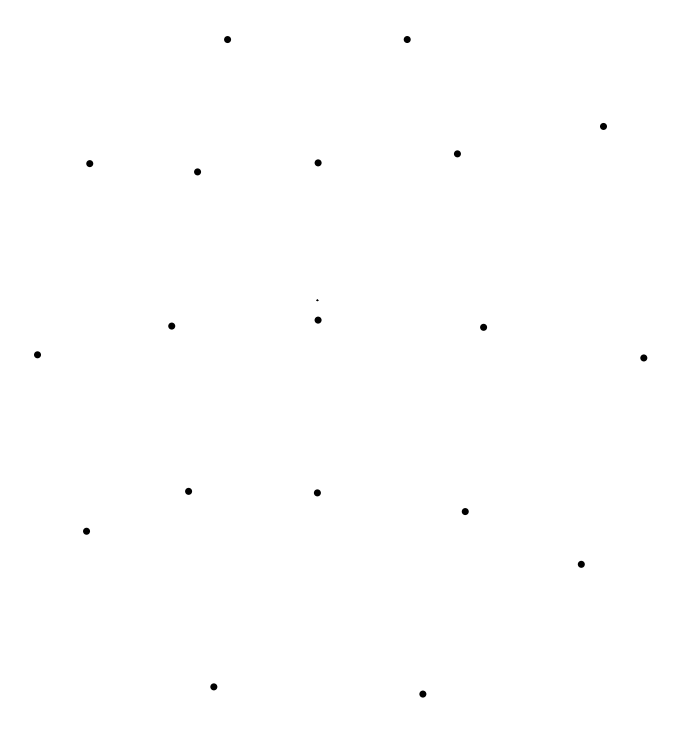

In [190]:
biosemi_montage = mne.channels.make_standard_montage('biosemi16') # NOT THE SAME AS OUR DATA
biosemi_montage.plot(show_names=False)
raw.plot_sensors();

--------------

In [182]:
raw.get_montage().get_positions()['ch_pos']

OrderedDict([('Fp1', array([-21.90840681,  63.62663337,  -5.28424423])),
             ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
             ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
             ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
             ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
             ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
             ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
             ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
             ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
             ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
             ('Pz',
              array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
             ('F4', array([46.26553757, 48.41411956, 36.35949753])),
             ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
             ('P4', array([ 49.47175167, -70.65298354,

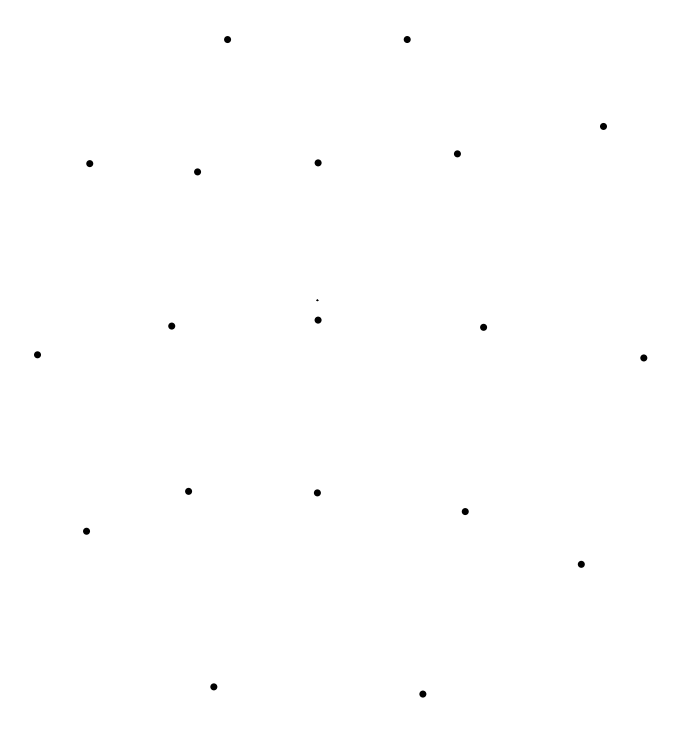

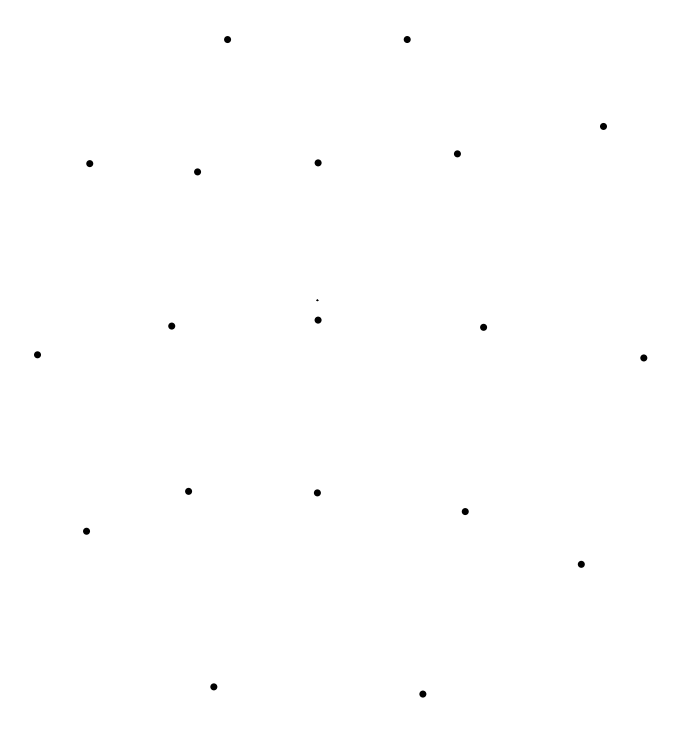

In [183]:
raw.plot_sensors()

In [173]:
import numpy as np
import scipy.interpolate
from scipy import signal
from matplotlib import patches
import matplotlib.pyplot as plt

def get_psds(data, fs=128, f_range=[0.5, 30]):
    '''
    Calculate signal power using Welch method.

    Input: data- mxn matrix (m: number of channels, n: samples of signals)
           fs- Sampling frequency (default 128Hz)
           f_range- Frequency range (default 0.5Hz to 30Hz)
    Output: Power values and PSD values
    '''
    powers = []
    psds = list()
    for sig in data:
        freq, psd = signal.welch(sig, fs)
        idx = np.logical_and(freq >= f_range[0], freq <= f_range[1])
        powers = np.append(powers, sum(psd[idx]))
        psds.append(psd[idx])
    
    return powers, psds

def plot_topomap(data, ax, fig, draw_cbar=True):
    '''
    Plot topographic plot of EEG data. This specialy design for Emotiv 14 electrode data. 
    This can be change for any other arrangement by changing ch_pos (channel position array)
    Input: data- 1D array 14 data values
           ax- Matplotlib subplot object to be plotted every thing
           fig- Matplot lib figure object to draw colormap
           draw_cbar- Visualize color bar in the plot
    '''
    N = 300            
    xy_center = [2,2]  
    radius = 2 

    # AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
    ch_pos = [[1,4],[0.1,3], [1.5,3.5], [0.5,2.5], 
             [-0.1,2], [0.4,0.4], [1.5,0], [2.5,0], 
             [3.6,0.4], [4.1,2], [3.5,2.5], [2.5,3.5], 
             [3.9,3], [3,4]]
    x,y = [],[]
    for i in ch_pos:
        x.append(i[0])
        y.append(i[1])

    xi = np.linspace(-2, 6, N)
    yi = np.linspace(-2, 6, N)
    zi = scipy.interpolate.griddata((x, y), data, (xi[None,:], yi[:,None]), method='cubic')

    dr = xi[1] - xi[0]
    for i in range(N):
        for j in range(N):
            r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
            if (r - dr/2) > radius:
                zi[j,i] = "nan"
    
    dist = ax.contourf(xi, yi, zi, 60, cmap = plt.get_cmap('coolwarm'), zorder = 1)
    ax.contour(xi, yi, zi, 15, linewidths = 0.5,colors = "grey", zorder = 2)
    
    if draw_cbar:
        cbar = fig.colorbar(dist, ax=ax, format='%.1e')
        cbar.ax.tick_params(labelsize=8)

    ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)
    circle = patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none", zorder=4)
    ax.add_patch(circle)

    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)
    
    ax.set_xticks([])
    ax.set_yticks([])

    circle = patches.Ellipse(xy = [0,2], width = 0.4, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    circle = patches.Ellipse(xy = [4,2], width = 0.4, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    
    xy = [[1.6,3.6], [2,4.3],[2.4,3.6]]
    polygon = patches.Polygon(xy = xy, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(polygon) 
    
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 4.5)

    return ax


# if __name__ == "__main__":
#     import mne
#     import matplotlib.pyplot as plt 

#     data = mne.io.read_raw_edf('1.edf')
#     raw_data = data.get_data()
#     ch_data = raw_data[2:16,:]
#     pwrs, _ = get_psds(ch_data)

#     fig, ax = plt.subplots(figsize=(10,8))
#     plot_topomap(pwrs, ax, fig)
#     plt.show()
#     fig.savefig("topograph.png", bbox_inches='tight')

In [174]:
import mne
import matplotlib.pyplot as plt 
#from topograph import get_psds, plot_topomap


#data = mne.io.read_raw_edf('1.edf')
data = mne.io.read_raw_eeglab('../data/fixica.set')
raw_data = data.get_data()

Reading /Users/mpin/Documents/MDS/capstone/simpl_eeg_capstone/data/fixica.fdt


<ipython-input-174-e3f8a9843db6>:7: RuntimeWarning: Data file name in EEG.data (109 whole fixed ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  data = mne.io.read_raw_eeglab('../data/fixica.set')


In [175]:
ch_data = raw_data[2:16,:]
pwrs, _ = get_psds(ch_data)

In [176]:
pwrs.shape

(14,)

In [177]:
ch_data.shape

(14, 11175225)

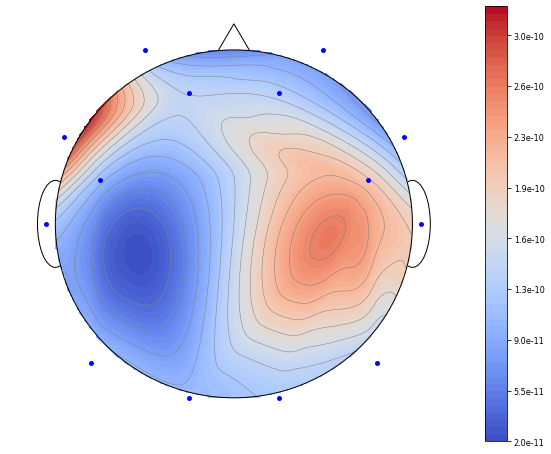

In [178]:
fig, ax = plt.subplots(figsize=(10,8))
plot_topomap(pwrs, ax, fig)
plt.show()
#fig.savefig("topograph.png", bbox_inches='tight')

-----------------------

(19, 30720)
(30720,)


/Users/mpin/opt/miniconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


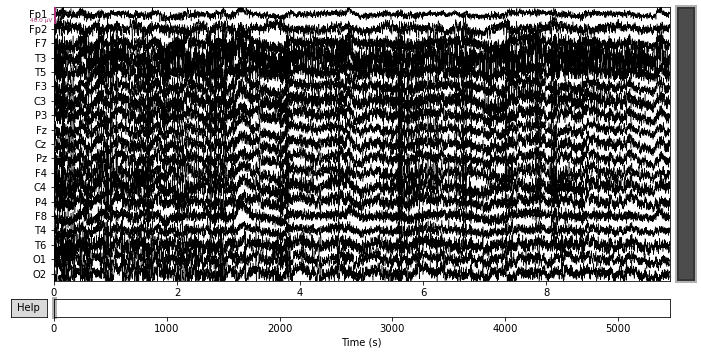

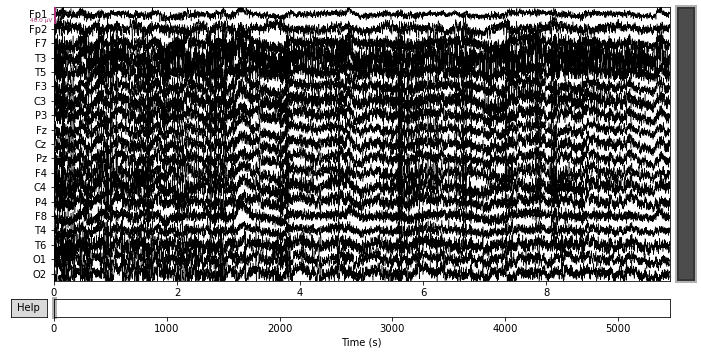

In [180]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()